# Calculation of hot film velocity
    
    @author Daniel Duke <daniel.duke@monash.edu>
    @copyright (c) 2022 LTRAC
    @license GPL-3.0+
    @version 0.0.1
    @date 20/09/23
        __   ____________    ___    ______
       / /  /_  ____ __  \  /   |  / ____/
      / /    / /   / /_/ / / /| | / /
     / /___ / /   / _, _/ / ___ |/ /_________
    /_____//_/   /_/ |__\/_/  |_|\__________/

    Laboratory for Turbulence Research in Aerospace & Combustion (LTRAC)
    Monash University, Australia

    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program.  If not, see <https://www.gnu.org/licenses/>.    

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import scipy.integrate
%matplotlib notebook

## Radial Poiseuille profile
Discrete numeric integration of the function:

$ u(r) = G \frac{1-r^2}{4 \mu} $

where $ G = \Delta p / \mu $

In [153]:
# Constants
G=1/5569.295048
mu = 1.48e-5 * 1.225
R = 4.1402e-3 * 0.5
resolution = 256

A = (np.pi*R**2) # Area
r = np.linspace(-1,1,resolution)
u = G*(1-(r**2))/(4*mu)

# Integrate discretely to find the flow rate
Q = scipy.integrate.simps(u*np.abs(np.pi*r*R),x=r*R)
ubar = Q / A
print("Q = %f L/min" % (Q*60000))
print("Ubar = %f, Umax = %f m/s" % (ubar,np.max(u)))

Q = 1.000000 L/min
Ubar = 1.237987, Umax = 2.475913 m/s


## 2D Poiseuille profile
Make a Cartesian grid, develop a cross sectional profile, check flow rate, and integrate over hot film area to find its average velocity relative to the bulk velocity.

In [163]:
# Make 2d grid for numeric integration
xx,yy = np.meshgrid(r,r)
delta = np.median(np.diff(r))  # uniform delta

# Make 2d Poiseuille profile
rr = np.sqrt(xx**2 + yy**2)
rr[rr>1]=np.nan
uu = G*(1-(rr**2))/(4*mu)

# Find flow rate using discrete integration
QQ = np.nansum(uu)*(delta*R)**2
uubar = QQ / A

# Define hot film
yh = 152.4e-6 # thickness
xh = 2.031e-3 # length
y0 = 0 # position wrt thickness - this could vary during a sweep
x0 = 0 # position wrt length - generally not varied

# Function for where the hot film is.
hotfilm = (np.abs((xx)*R) - x0<=xh/2.)&(np.abs((yy)*R) - y0<=yh/2.)
uu_hot_avg = np.nansum(uu*hotfilm)/np.nansum(hotfilm) # since uniform delta

print("Q = %f L/min" % (QQ*60000))
print("Ubar = %f, Umax = %f m/s" % (uubar,np.nanmax(uu)))
print("U_avg_hotwire = %f m/s" % uu_hot_avg)
print("U_avg_hotwire / Ubar = %f" % (uu_hot_avg/uubar))



Q = 0.999989 L/min
Ubar = 1.237973, Umax = 2.475874 m/s
U_avg_hotwire = 2.273204 m/s
U_avg_hotwire / Ubar = 1.836230


## Draw a graph

<IPython.core.display.Javascript object>


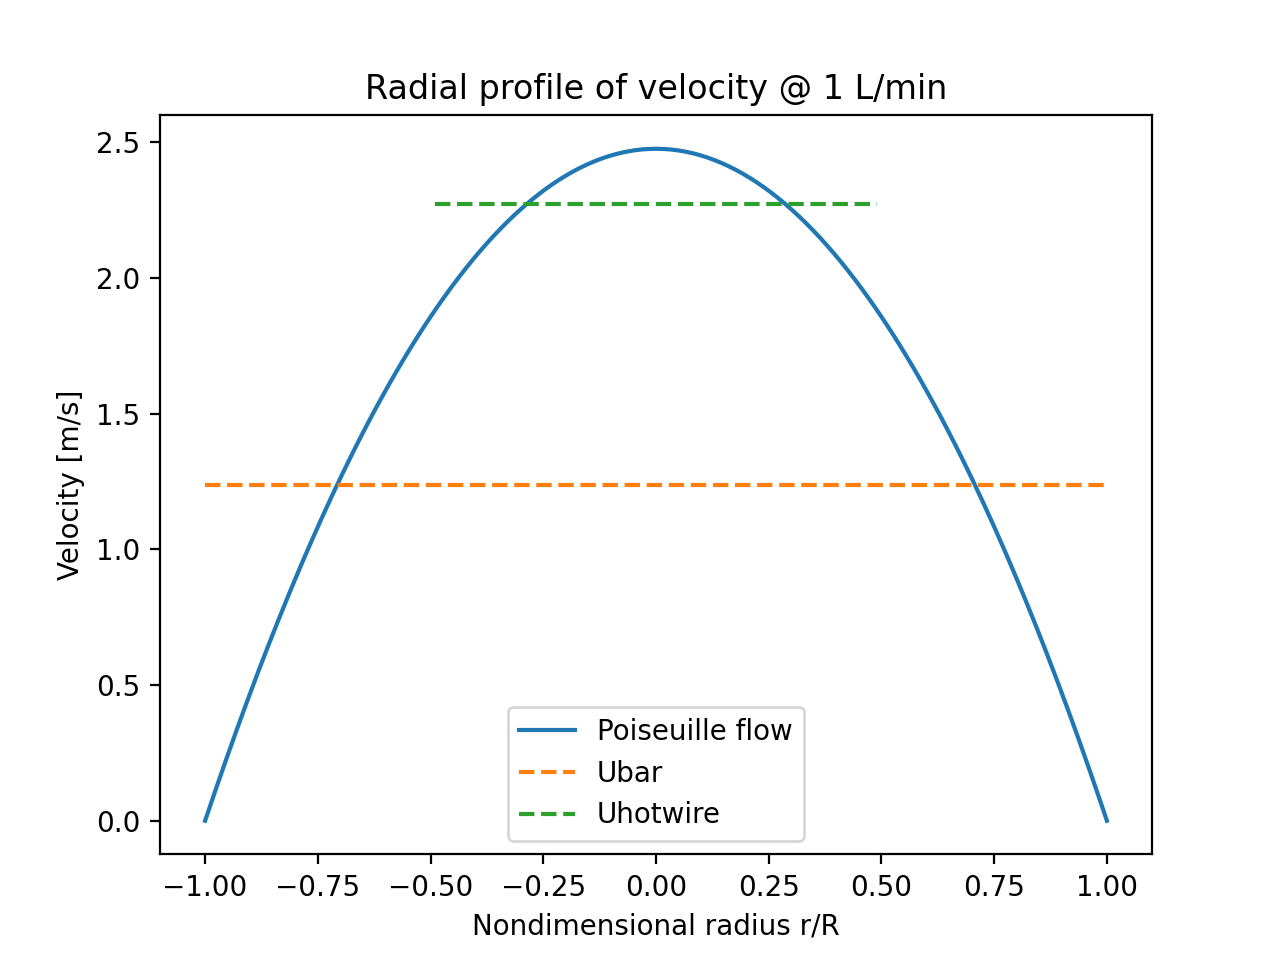

<IPython.core.display.Javascript object>


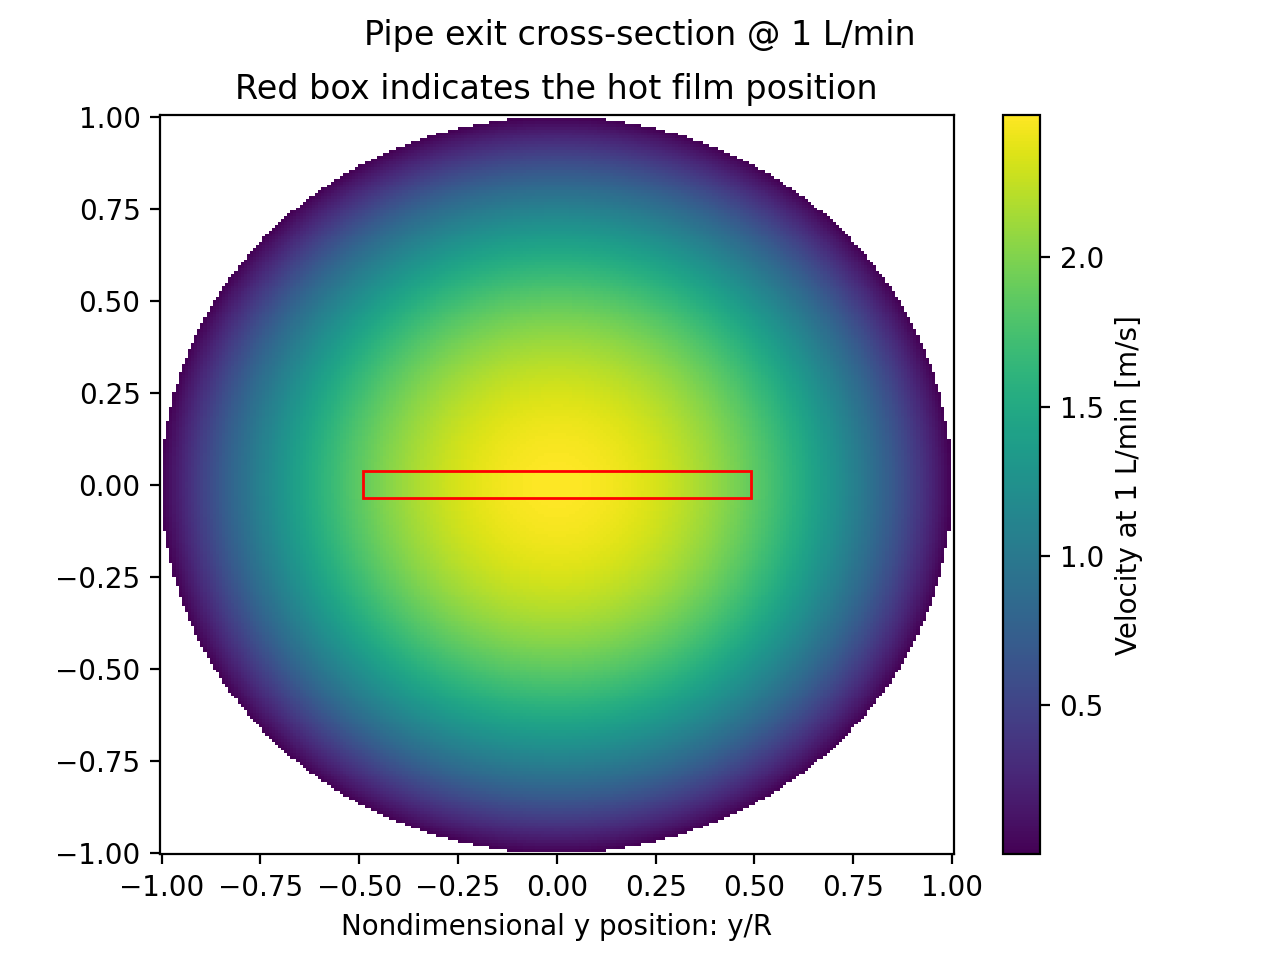

In [164]:
fig=plt.figure()
plt.plot(r,u,label='Poiseuille flow');
plt.plot(r,np.ones_like(r)*ubar,ls='--',label='Ubar');
hw = np.where(np.abs(r)<=xh/(2*R))[0]
plt.plot(r[hw],uu_hot_avg*np.ones_like(hw),ls='--',label='Uhotwire');
plt.legend();
plt.title("Radial profile of velocity @ 1 L/min")
plt.ylabel("Velocity [m/s]")
plt.xlabel("Nondimensional radius r/R");

fig=plt.figure()
ph=plt.pcolormesh(xx,yy,uu)
rect=patches.Rectangle((-(xh-x0)/(2*R),-(yh-y0)/(2*R)),xh/R,yh/R,linewidth=1, edgecolor='r', facecolor='none')
plt.gca().add_patch(rect)
plt.colorbar(ph,label="Velocity at 1 L/min [m/s]");
plt.suptitle("Pipe exit cross-section @ 1 L/min")
plt.title("Red box indicates the hot film position")
plt.xlabel("Nondimensional x position: x/R");
plt.xlabel("Nondimensional y position: y/R");
